In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
from statistics import mean, stdev
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # for displaying all columns

sns.set()



In [2]:
df = pd.read_csv("mdg.csv")

In [3]:
df

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.46,NaN,C,,,,,,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,28.1,NaN,C,,,,,,,,,,,,,28.5,NaN,C,,,,,,,,,,,,,28.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,894,Zambia,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2445.9,NaN,G,2416.6,NaN,G,2456.9,NaN,G,2500.9,NaN,G,2420.2,NaN,G,2170.9,NaN,G,1870.2,NaN,G,2390.9,NaN,G,2313.9,NaN,G,1807.8,NaN,G,1822.5,NaN,G,1906.8,NaN,G,1969.2,NaN,G,2101.2,NaN,G,2126.9,NaN,G,2277.2,NaN,G,2225.9,NaN,G,1914.2,NaN,G,2159.9,NaN,G,2486.2,NaN,G,2673.2,NaN,G,3047.3,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
686,894,Zambia,616,Y,Terrestrial and marine areas protected to tota...,36.05,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,36.06,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,37.85,NaN,C,,,,,,,,,,,,,,,
687,716,Zimbabwe,567,Y,"Proportion of land area covered by forest, per...",57.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,48.8,NaN,C,,,,,,,,,,,,,44.6,NaN,C,,,,,,,,,,,,,40.4,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
688,716,Zimbabwe,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",15504.1,NaN,G,15823.1,NaN,G,16901.2,NaN,G,16208.1,NaN,G,17645.6,NaN,G,15130,NaN,G,14994.4,NaN,G,14407.6,NaN,G,14253.6,NaN,G,15834.1,NaN,G,13886.9,NaN,G,12563.1,NaN,G,11932.4,NaN,G,10627,NaN,G,9864.2,NaN,G,10715,NaN,G,10249.3,NaN,G,9732.2,NaN,G,7682.4,NaN,G,8239.7,NaN,G,9028.2,NaN,G,9860.6,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,


 The Dataframe has 690 rows and 95 Columns

 # MISSING VALUES

In [4]:
#since there are empty cells. they need to be replaced with "NaN" before finding the some of missing values
df1 = df.replace(r'^\s*$', np.nan, regex=True)

df1.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dealing with mising values
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum().sort_values(ascending=False).head(50)

Type.29         690
Footnotes.18    690
Footnotes.14    690
Footnotes.1     690
Footnotes.21    690
Footnotes.9     690
Footnotes.2     690
Footnotes.19    690
Footnotes.8     690
Footnotes.3     690
Footnotes.11    690
Type.22         690
Footnotes.7     690
Footnotes.17    690
Footnotes.4     690
Footnotes.12    690
Footnotes.16    690
Footnotes.13    690
Footnotes.5     690
Footnotes.6     690
Footnotes.22    690
2012            690
2013            690
Footnotes.23    690
2019            690
Type.28         690
Footnotes.28    690
2018            690
Type.27         690
Footnotes.27    690
2017            690
Type.26         690
Footnotes.26    690
2016            690
Type.25         690
Footnotes.25    690
2015            690
Footnotes.24    690
Type.23         690
Footnotes.29    690
Footnotes.10    685
Footnotes       685
Footnotes.20    685
Footnotes.15    685
Type.1          508
1991            508
1993            486
Type.3          486
1992            486
Type.2          486


 # CLEANING THE DATA

In [6]:
#since we have columns with 690 missing value, it means there is no data available along the columns.. therefore all columns with 690 missing values should be dropped
df2 = df1.dropna(how='all', axis='columns')
df2.head() 

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Type.1,1992,Type.2,1993,Type.3,1994,Type.4,1995,Type.5,1996,Type.6,1997,Type.7,1998,Type.8,1999,Type.9,2000,Footnotes.10,Type.10,2001,Type.11,2002,Type.12,2003,Type.13,2004,Type.14,2005,Footnotes.15,Type.15,2006,Type.16,2007,Type.17,2008,Type.18,2009,Type.19,2010,Footnotes.20,Type.20,2011,Type.21,2014,Type.24
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,G,1426.5,G,1375.1,G,1320.1,G,1268.8,G,1199.1,G,1114.8,G,1056.1,G,832.4,G,781.1,NaN,G,645.4,G,894.7,G,1037.8,G,957.1,G,1338.5,NaN,G,1657.5,G,2280.9,G,4217.1,G,6776.6,G,8470.8,NaN,G,12251.4,G,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,C
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,G,2387.2,G,2343.2,G,1928.8,G,2086.5,G,2016.9,G,1543.8,G,1752.8,G,2984.9,G,3021.6,NaN,G,3223.3,G,3751.3,G,4294.1,G,4165.7,G,4253.7,NaN,G,3865,G,4477.4,G,4657.1,G,4488.4,G,4415.1,NaN,G,4668.1,G,NaN,NaN


In [7]:
df2.columns


Index(['CountryCode', 'Country', 'SeriesCode', 'MDG', 'Series', '1990',
       'Footnotes', 'Type', '1991', 'Type.1', '1992', 'Type.2', '1993',
       'Type.3', '1994', 'Type.4', '1995', 'Type.5', '1996', 'Type.6', '1997',
       'Type.7', '1998', 'Type.8', '1999', 'Type.9', '2000', 'Footnotes.10',
       'Type.10', '2001', 'Type.11', '2002', 'Type.12', '2003', 'Type.13',
       '2004', 'Type.14', '2005', 'Footnotes.15', 'Type.15', '2006', 'Type.16',
       '2007', 'Type.17', '2008', 'Type.18', '2009', 'Type.19', '2010',
       'Footnotes.20', 'Type.20', '2011', 'Type.21', '2014', 'Type.24'],
      dtype='object')

In [8]:
# New Dataframe missing values in descending order
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum().sort_values(ascending=False)

Footnotes       685
Footnotes.20    685
Footnotes.10    685
Footnotes.15    685
Type.1          508
1991            508
Type.2          486
1993            486
Type.3          486
1992            486
1994            485
Type.4          485
Type.6          484
1996            484
Type.5          483
1995            483
Type.8          481
1999            481
Type.9          481
Type.7          481
1997            481
1998            481
Type.11         479
2001            479
2002            478
Type.12         478
2003            478
2004            478
Type.14         478
Type.13         478
2006            476
Type.16         476
2007            475
Type.17         475
2008            475
Type.18         475
2009            475
Type.19         475
2011            475
Type.21         475
Type.24         467
2014            467
2005            254
Type.15         253
2010            252
Type.20         251
1990             63
Type             62
2000             34
Type.10          33


In [9]:
#droping Footnote columns to have consistancy in the data
df2.drop(['Footnotes','Footnotes.10','Footnotes.15','Footnotes.20'], axis='columns', inplace=True)


In [10]:
df2.columns


Index(['CountryCode', 'Country', 'SeriesCode', 'MDG', 'Series', '1990', 'Type',
       '1991', 'Type.1', '1992', 'Type.2', '1993', 'Type.3', '1994', 'Type.4',
       '1995', 'Type.5', '1996', 'Type.6', '1997', 'Type.7', '1998', 'Type.8',
       '1999', 'Type.9', '2000', 'Type.10', '2001', 'Type.11', '2002',
       'Type.12', '2003', 'Type.13', '2004', 'Type.14', '2005', 'Type.15',
       '2006', 'Type.16', '2007', 'Type.17', '2008', 'Type.18', '2009',
       'Type.19', '2010', 'Type.20', '2011', 'Type.21', '2014', 'Type.24'],
      dtype='object')

 # 1.

 #### Number of country represented

In [11]:
df['Country'].nunique()

230

 ### Missing values by Country, Year, Series

In [12]:
#missing values by country in ascending order
df1.groupby('Country').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False).head(50)

Country
Yugoslavia [former Socialist Federal Republic]    266
Sudan                                             264
South Sudan                                       264
Monaco                                            260
United States Virgin Islands                      256
San Marino                                        256
Mayotte                                           256
Puerto Rico                                       256
Tuvalu                                            256
Guam                                              256
Tokelau                                           256
American Samoa                                    256
Northern Mariana Islands                          256
Western Sahara                                    256
Liechtenstein                                     246
Montenegro                                        244
Serbia                                            244
Lesotho                                           242
Serbia and Montenegr

In [13]:
# missing values by series
df1.groupby('Series').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False)

Series
Terrestrial and marine areas protected to total territorial area, percentage    19362
Proportion of land area covered by forest, percentage                           18892
Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)             11550
dtype: int64

In [14]:
# Missing values by year


# 2. Top and bottom 5 countries in terms of C02 emissions in 1990 and their emissions

In [15]:
df_90 = df2.loc[:, ('Country','1990') ]
display(df_90)

df_11 = df2.loc[:, ('Country','2011') ]
display(df_11)

,Country,1990
0,Afghanistan,2.1
1,Afghanistan,2676.9
2,Afghanistan,0.36
3,Albania,28.8
4,Albania,7488
...,...,...
685,Zambia,2445.9
686,Zambia,36.05
687,Zimbabwe,57.3
688,Zimbabwe,15504.1


,Country,2011
0,Afghanistan,NaN
1,Afghanistan,12251.4
2,Afghanistan,NaN
3,Albania,NaN
4,Albania,4668.1
...,...,...
685,Zambia,3047.3
686,Zambia,NaN
687,Zimbabwe,NaN
688,Zimbabwe,9860.6


In [16]:
#filling NaN values with '0' 
#1990
df_90['1990'] = df_90['1990'].fillna(0)
display(df_90)

#2011
df_11['2011'] = df_11['2011'].fillna(0)
display(df_11)

,Country,1990
0,Afghanistan,2.1
1,Afghanistan,2676.9
2,Afghanistan,0.36
3,Albania,28.8
4,Albania,7488
...,...,...
685,Zambia,2445.9
686,Zambia,36.05
687,Zimbabwe,57.3
688,Zimbabwe,15504.1


,Country,2011
0,Afghanistan,0
1,Afghanistan,12251.4
2,Afghanistan,0
3,Albania,0
4,Albania,4668.1
...,...,...
685,Zambia,3047.3
686,Zambia,0
687,Zimbabwe,0
688,Zimbabwe,9860.6


In [17]:
df5 = df_90.groupby('Country')['1990'].apply(lambda x : x.astype(float).sum()) #1990
df6 = df_11.groupby('Country')['2011'].apply(lambda x : x.astype(float).sum()) #2011

In [18]:
display(df5.reset_index().sort_values(['1990'],ascending=False))
display(df6.reset_index().sort_values(['2011'],ascending=False))



,Country,1990
217,United States,4823599.85
41,China,2460773.08
100,Japan,1094358.17
92,India,690601.04
215,United Kingdom,555919.37
...,...,...
131,Monaco,0.18
179,Serbia and Montenegro,0.00
204,Tokelau,0.00
174,San Marino,0.00


,Country,2011
41,China,9019518.2
217,United States,5305569.6
92,India,2074344.9
166,Russian Federation,1808073.0
100,Japan,1187657.0
...,...,...
83,Guam,0.0
179,Serbia and Montenegro,0.0
188,South Sudan,0.0
192,Sudan,0.0


  ### 1990
##### The top 5  countries and their emission 
* United States = 4823599.85
* China = 2460773.08
* Japan = 1094358.17
* India = 690601.04
* United Kingdom = 555919.37 
##### The bottom 5  countries and their emission
* Sudan = 1.28
* Monaco = 0.18
* Serbia and Montenegro = 0.00
* Tokelau = 0.00
* San Marino = 0.00

 ### 2011
##### The top 5  countries and their emission 
* China	= 9019518.2
* United States = 5305569.6
* India = 2074344.9
* Russian Federation = 1808073.0
* Japan	= 1187657.0 
##### The bottom 5  countries and their emission
* Guam	0.0
* Serbia and Montenegro	0.0
* South Sudan	0.0
* Sudan	0.0
* Mayotte 0.0



 Four countries remained within the Top 5 , in 1990 and 2011, Russian Federation replaced United Kindom in 2011 from 1990 top 5.
 The bottom 5 completely with non of the countries that were in th bottom 5 in 1990, appearing again in botton 5 in 2011.



# 3. Mean and median of 1990


In [19]:
display(df5.describe())

count    2.300000e+02
mean     7.168503e+04
std      3.713651e+05
min     -2.998600e+03
25%      8.575250e+01
50%      1.236955e+03
75%      2.138662e+04
max      4.823600e+06
Name: 1990, dtype: float64

Mean = 71 685,03 
median = 1 236.96

The median being very small compared to the mean, it means the any many small numbers compared to largest number, yet the largest numbers are so large that they affect the average.

In [20]:
df5.median()

1236.955

In [21]:
(16487557.04 + 2*2998.60)/230

71711.10539130434

# 4. The minimum, maximum and interquartile range of the CO2 emissions for 1990

* The minimum = 0
* The maximum = 4823599.85

* Q1 = 857.52
* Q2 = 1 236.96
* Q3 = 21 386.62

** Based on the information, the distribution of the data is negatively skewed(to the left)

# 5. Histogram


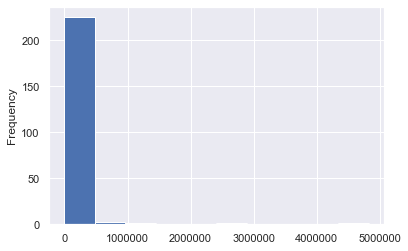

In [22]:
df5 = df_90.groupby('Country')['1990'].apply(lambda x : x.astype(float).sum())
df5.plot(kind = 'hist')

# 6. The standard deviation and standard error of the mean in 1990

In [23]:
# the standard deviation
df5.std()

371365.112172181

In [24]:
# Standard error
df5.sem()

24487.090346677225

# 7. line graph to show C02 emissions in Brazil, Russia, China, India, the USA and South Africa over time

In [25]:
#index positions
bra = df2['Country'][df2['Country']=='Brazil']
rus = df2['Country'][df2['Country']=='Russian Federation']
chi = df2['Country'][df2['Country']=='China']
ind = df2['Country'][df2['Country']=='India']
usa = df2['Country'][df2['Country']=='United States']
rsa = df2['Country'][df2['Country']=='South Africa']

display(bra)
display(rus)
display(chi)
display(ind)
display(usa)
display(rsa)


81    Brazil
82    Brazil
83    Brazil
Name: Country, dtype: object

498    Russian Federation
499    Russian Federation
500    Russian Federation
Name: Country, dtype: object

123    China
124    China
125    China
Name: Country, dtype: object

276    India
277    India
278    India
Name: Country, dtype: object

651    United States
652    United States
653    United States
Name: Country, dtype: object

561    South Africa
562    South Africa
563    South Africa
Name: Country, dtype: object

In [26]:
#slicing the dataframe
df_cou = df2.loc[(81,82,83,123,124,125,276,277,278,498,499,500,561,562,563,651,652,653), ('Country','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2014') ]

In [27]:
df_cou.head()


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
81,Brazil,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.6,NaN,NaN,NaN,NaN,63.7,NaN,NaN,NaN,NaN,62.4,NaN,NaN
82,Brazil,208887,219330.6,220705.7,230738.6,242154,258347.5,284782.9,300547.3,312289.1,320173.1,327983.8,337433.7,332266.9,321621.6,337826,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9,NaN
83,Brazil,4.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37
123,China,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.8,NaN,NaN,NaN,NaN,20.5,NaN,NaN,NaN,NaN,21.9,NaN,NaN
124,China,2460744,2584538.3,2695982.1,2878694,3058241.3,3320285.2,3463089.1,3469510,3324344.5,3318055.6,3405179.9,3487566.4,3694242.1,4525177,5288166,5790017,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2,NaN


In [28]:
# Fill NaN with '0'
df_cou = df_cou.fillna(0)

In [29]:
df_cou.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
81,Brazil,69,0,0,0,0,0,0,0,0,0,65.6,0,0,0,0,63.7,0,0,0,0,62.4,0,0
82,Brazil,208887,219330.6,220705.7,230738.6,242154,258347.5,284782.9,300547.3,312289.1,320173.1,327983.8,337433.7,332266.9,321621.6,337826,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9,0
83,Brazil,4.73,0,0,0,0,0,0,0,0,0,10.22,0,0,0,0,0,0,0,0,0,0,0,20.37
123,China,16.7,0,0,0,0,0,0,0,0,0,18.8,0,0,0,0,20.5,0,0,0,0,21.9,0,0
124,China,2460744,2584538.3,2695982.1,2878694,3058241.3,3320285.2,3463089.1,3469510,3324344.5,3318055.6,3405179.9,3487566.4,3694242.1,4525177,5288166,5790017,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2,0


In [30]:
#summing the emmisions by country
df_group = df_cou.groupby('Country')[('1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2014')].apply(lambda x : x.astype(float).sum())

In [31]:
df_group

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
Country,,,,,,,,,,,,,,,,,,,,,,,
Brazil,208960.73,219330.6,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,312289.1,320173.1,328059.62,337433.7,332266.9,321621.6,337826.0,347372.6,347668.3,363212.7,387675.2,367147.4,419816.6,439412.9,20.37
China,2460773.08,2584538.3,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,3324344.5,3318055.6,3405212.88,3487566.4,3694242.1,4525177.0,5288166.0,5790037.5,6414463.1,6791804.7,7035443.9,7692210.9,8256991.1,9019518.2,15.61
India,690601.04,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,1144390.0,1186688.15,1203843.1,1226791.2,1281913.5,1348524.6,1411150.4,1504364.7,1611199.1,1793075.0,1965820.0,1950973.3,2074344.9,3.13
Russian Federation,52.99,0.0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,1533968.4,1558169.76,1558002.0,1557660.9,1604968.9,1602955.7,1615736.9,1669618.1,1667597.6,1715639.0,1574367.8,1742589.5,1808073.0,8.75
South Africa,319805.58,332618.9,307822.6,321104.5,337576.7,353458.5,358639.9,371327.8,372218.8,371034.4,368621.13,362743.3,347686.6,380810.6,424774.3,391826.6,422445.7,440989.8,469090.0,477806.4,454957.6,477241.7,10.24
United States,4823599.85,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,5510430.2,5701873.96,5601404.8,5648727.5,5679222.2,5763456.9,5795194.8,5703871.8,5794923.4,5622464.4,5274132.4,5408902.2,5305569.6,14.82
